In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import defaultdict
import cv2
from wordcloud import WordCloud

In [25]:
dataset_path = r'C:\Users\hibah\Desktop\DL2024\COD10K-v3'
# dataset_path = r'/Users/chaitanyamodi/Downloads/COD10K-v3'
train_path = os.path.join(dataset_path, 'Train')
test_path = os.path.join(dataset_path, 'Test')

In [26]:
# List train and test directories
train_images = os.listdir(os.path.join(train_path, 'Image'))
test_images = os.listdir(os.path.join(test_path, 'Image'))

print(f'Training images: {len(train_images)}')
print(f'Testing images: {len(test_images)}')

Training images: 6000
Testing images: 4000


In [27]:
# Define the counts based on the README information
train_camouflaged = 3040
train_non_camouflaged = 2960
test_camouflaged = 2026
test_non_camouflaged = 1974

# Print characteristics
print("\nDataset Characteristics:")
print(f"Total Training Images: {len(train_images)}")
print(f"Total Testing Images: {len(test_images)}")
print(f"Training Camouflaged Images: {train_camouflaged}")
print(f"Training Non-Camouflaged Images: {train_non_camouflaged}")
print(f"Testing Camouflaged Images: {test_camouflaged}")
print(f"Testing Non-Camouflaged Images: {test_non_camouflaged}")


Dataset Characteristics:
Total Training Images: 6000
Total Testing Images: 4000
Training Camouflaged Images: 3040
Training Non-Camouflaged Images: 2960
Testing Camouflaged Images: 2026
Testing Non-Camouflaged Images: 1974


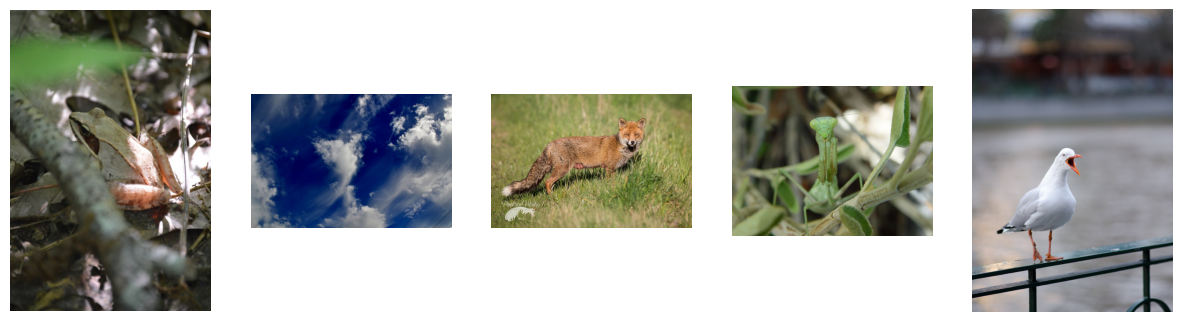

In [28]:
# Function to display images
def display_sample_images(image_list, folder_path, n=5):
    plt.figure(figsize=(15, 10))
    for i in range(n):
        img_path = os.path.join(folder_path, image_list[i])
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display sample training images
display_sample_images(train_images, os.path.join(train_path, 'Image'))

In [29]:
# Load ground truth instance files
gt_instance_folder = os.path.join(train_path, 'GT_Instance')
gt_files = os.listdir(gt_instance_folder)

# Display the number of ground truth files
print(f'\nNumber of Ground Truth Instance Files: {len(gt_files)}')


Number of Ground Truth Instance Files: 6000


In [ ]:
# Define file paths
file_paths = [
    r'C:\Users\hibah\Desktop\DL2024\COD10K-v3\Info\CAM_test.txt',
    r'C:\Users\hibah\Desktop\DL2024\COD10K-v3\Info\CAM_train.txt',
    r'C:\Users\hibah\Desktop\DL2024\COD10K-v3\Info\NonCAM_test.txt',
    r'C:\Users\hibah\Desktop\DL2024\COD10K-v3\Info\NonCAM_train.txt'
]

# Superclass and subclass dictionaries
Super_Class_Dictionary = {
    '1': 'Aquatic',
    '2': 'Terrestrial',
    '3': 'Flying',
    '4': 'Amphibian',
    '5': 'Other'
}

Sub_Class_Dictionary = {
    '1': 'batFish', '2': 'clownFish', '3': 'crab', '4': 'crocodile',
    '5': 'crocodileFish', '6': 'fish', '7': 'flounder', '8': 'frogFish',
    '9': 'ghostPipefish', '10': 'leafySeaDragon', '11': 'octopus', 
    '12': 'pagurian', '13': 'pipefish', '14': 'scorpionFish', 
    '15': 'seaHorse', '16': 'shrimp', '17': 'slug', '18': 'starFish', 
    '19': 'stingaree', '20': 'turtle', '21': 'ant', '22': 'bug', 
    '23': 'cat', '24': 'caterpillar', '25': 'centipede', 
    '26': 'chameleon', '27': 'cheetah', '28': 'deer', '29': 'dog', 
    '30': 'duck', '31': 'gecko', '32': 'giraffe', '33': 'grouse', 
    '34': 'human', '35': 'kangaroo', '36': 'leopard', '37': 'lion', 
    '38': 'lizard', '39': 'monkey', '40': 'rabbit', '41': 'raccoon', 
    '42': 'sciuridae', '43': 'sheep', '44': 'snake', '45': 'spider', 
    '46': 'stickInsect', '47': 'tiger', '48': 'wolf', '49': 'worm', 
    '50': 'bat', '51': 'bee', '52': 'beetle', '53': 'bird', 
    '54': 'bittern', '55': 'butterfly', '56': 'cicada', 
    '57': 'dragonfly', '58': 'frogmouth', '59': 'grasshopper', 
    '60': 'heron', '61': 'katydid', '62': 'mantis', 
    '63': 'mockingbird', '64': 'moth', '65': 'owl', 
    '66': 'owlfly', '67': 'frog', '68': 'toad', '69': 'other'
}

# Initialize dictionaries for counting classes
superclass_counts = defaultdict(int)
subclass_counts = defaultdict(int)

# Read each file and count occurrences of superclasses and subclasses
for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        for line in lines:
            parts = line.strip().split('-')
            if len(parts) >= 6:
                # Extract superclass and subclass
                superclass_id = parts[2]  # Superclass is at index 2
                subclass_id = parts[4]   # Subclass is at index 4
                
                # Count superclass occurrences
                if superclass_id in Super_Class_Dictionary:
                    superclass_counts[Super_Class_Dictionary[superclass_id]] += 1
                    
                # Count subclass occurrences using the subclass dictionary
                if subclass_id in Sub_Class_Dictionary:
                    subclass_name = Sub_Class_Dictionary[subclass_id]
                    subclass_counts[subclass_name] += 1

# Convert counts to DataFrames for easy plotting
superclass_df = pd.DataFrame(list(superclass_counts.items()), columns=['Superclass', 'Count'])
subclass_df = pd.DataFrame(list(subclass_counts.items()), columns=['Subclass', 'Count'])

# Sort DataFrames by Count
superclass_df = superclass_df.sort_values(by='Count', ascending=False)
subclass_df = subclass_df.sort_values(by='Count', ascending=False)

# Define a color palette for the pie chart
colors = sns.color_palette('pastel')[0:len(superclass_df)]

# Plot Superclass Distribution as a Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(superclass_df['Count'], labels=superclass_df['Superclass'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=[0.1]*len(superclass_df))
plt.title('Distribution of Superclasses', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Plot Subclass Distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=subclass_df.head(20), x='Count', y='Subclass', palette='plasma')  # Show top 20 subclasses
plt.title('Top 20 Subclasses Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Subclass', fontsize=14)

# Rotate y-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed for better readability
plt.tight_layout()  # Adjust layout for better fitting
plt.show()


In [ ]:
# Define file paths for train and test files
train_files = [
    "C:\\Users\\hibah\\Desktop\\DL2024\\COD10K-v3\\Info\\CAM_train.txt",
    "C:\\Users\\hibah\\Desktop\\DL2024\\COD10K-v3\\Info\\NonCAM_train.txt"
]

test_files = [
    "C:\\Users\\hibah\\Desktop\\DL2024\\COD10K-v3\\Info\\CAM_test.txt",
    "C:\\Users\\hibah\\Desktop\\DL2024\\COD10K-v3\\Info\\NonCAM_test.txt"
]


# Function to load data and extract subclass distribution
def load_data_and_count_subclasses(files):
    subclass_counts = {}
    for file in files:
        with open(file, 'r') as f:
            for line in f:
                parts = line.split('-')
                subclass_id = parts[4]  # Assuming this is the position of subclass ID
                if subclass_id in subclass_counts:
                    subclass_counts[subclass_id] += 1
                else:
                    subclass_counts[subclass_id] = 1
    return subclass_counts

# Load training data subclass distribution
train_subclass_counts = load_data_and_count_subclasses(train_files)
train_subclass_df = pd.DataFrame(train_subclass_counts.items(), columns=['Subclass_ID', 'Count'])

# Map subclass IDs to names
train_subclass_df['Subclass'] = train_subclass_df['Subclass_ID'].map(Sub_Class_Dictionary)

# Load testing data subclass distribution
test_subclass_counts = load_data_and_count_subclasses(test_files)
test_subclass_df = pd.DataFrame(test_subclass_counts.items(), columns=['Subclass_ID', 'Count'])

# Map subclass IDs to names
test_subclass_df['Subclass'] = test_subclass_df['Subclass_ID'].map(Sub_Class_Dictionary)

# Plot Training Subclass Distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=train_subclass_df.head(20), x='Count', y='Subclass', palette='plasma')  # Show top 20 subclasses
plt.title('Top 20 Subclasses Distribution - Training Data')
plt.xlabel('Count')
plt.ylabel('Subclass')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

# Plot Testing Subclass Distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=test_subclass_df.head(20), x='Count', y='Subclass', palette='plasma')  # Show top 20 subclasses
plt.title('Top 20 Subclasses Distribution - Testing Data')
plt.xlabel('Count')
plt.ylabel('Subclass')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fitting
plt.show()


In [ ]:
# Initialize dictionaries for counting classes
train_subclass_counts = defaultdict(int)
test_subclass_counts = defaultdict(int)

# Read each file and count occurrences of subclasses
for file_path in file_paths:
    if 'train' in file_path:
        dataset_type = 'train'
    else:
        dataset_type = 'test'
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        for line in lines:
            parts = line.strip().split('-')
            if len(parts) >= 6:
                # Extract subclass ID
                subclass_id = parts[4]   # Subclass is at index 4
                
                # Count subclass occurrences using the subclass dictionary
                if subclass_id in Sub_Class_Dictionary:
                    subclass_name = Sub_Class_Dictionary[subclass_id]
                    if dataset_type == 'train':
                        train_subclass_counts[subclass_name] += 1
                    else:
                        test_subclass_counts[subclass_name] += 1

# Convert counts to DataFrames for easy plotting
train_subclass_df = pd.DataFrame(list(train_subclass_counts.items()), columns=['Subclass', 'Train Count'])
test_subclass_df = pd.DataFrame(list(test_subclass_counts.items()), columns=['Subclass', 'Test Count'])

# Merge both DataFrames
merged_df = pd.merge(train_subclass_df, test_subclass_df, on='Subclass', how='outer').fillna(0)

# Sort DataFrame by Train Count
merged_df = merged_df.sort_values(by='Train Count', ascending=False)

# Plot Subclass Distribution
plt.figure(figsize=(12, 8))

# Set bar width
bar_width = 0.35

# Define positions for bars
r1 = range(len(merged_df))
r2 = [x + bar_width for x in r1]

# Create bars for train and test counts
plt.bar(r1, merged_df['Train Count'], color='blue', width=bar_width, edgecolor='grey', label='Train Count')
plt.bar(r2, merged_df['Test Count'], color='orange', width=bar_width, edgecolor='grey', label='Test Count')

# Add titles and labels
plt.title('Subclass Distribution: Train vs Test', fontsize=16)
plt.xlabel('Subclass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([r + bar_width/2 for r in range(len(merged_df))], merged_df['Subclass'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()  # Adjust layout for better fitting
plt.show()


In [ ]:
# Initialize a dictionary for counting subclasses
subclass_counts = defaultdict(int)

# Read each file and count occurrences of subclasses
for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        for line in lines:
            parts = line.strip().split('-')
            if len(parts) >= 6:
                subclass_id = parts[4]   # Subclass is at index 4
                if subclass_id in Sub_Class_Dictionary:
                    subclass_name = Sub_Class_Dictionary[subclass_id]
                    subclass_counts[subclass_name] += 1

# Convert subclass counts to DataFrame
subclass_df = pd.DataFrame(list(subclass_counts.items()), columns=['Subclass', 'Count'])

# Print the counts DataFrame
print(subclass_df)

# Generate the word cloud input string from unique subclass names
wordcloud_input = ' '.join(subclass_counts.keys())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(wordcloud_input)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Subclasses', fontsize=16)
plt.show()


In [ ]:
# Define file paths
file_paths = [
    r'C:\Users\hibah\Desktop\DL2024\COD10K-v3\Info\CAM_test.txt',
    r'C:\Users\hibah\Desktop\DL2024\COD10K-v3\Info\CAM_train.txt',
    r'C:\Users\hibah\Desktop\DL2024\COD10K-v3\Info\NonCAM_test.txt',
    r'C:\Users\hibah\Desktop\DL2024\COD10K-v3\Info\NonCAM_train.txt'
]

# Initialize counts
cam_train_count = 0
cam_test_count = 0
noncam_train_count = 0
noncam_test_count = 0

# Read each file and count occurrences
for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        count = len(lines)  # Count the number of lines (files) in the current file
        
        # Determine if the file is CAM or NonCAM and if it's train or test
        if 'train' in file_path and 'CAM' in file_path:
            cam_train_count += count
        elif 'test' in file_path and 'CAM' in file_path:
            cam_test_count += count
        elif 'train' in file_path and 'NonCAM' in file_path:
            noncam_train_count += count
        elif 'test' in file_path and 'NonCAM' in file_path:
            noncam_test_count += count

# Create a summary DataFrame
summary_data = {
    'Category': ['CAM Train', 'CAM Test', 'NonCAM Train', 'NonCAM Test'],
    'Number of Files': [cam_train_count, cam_test_count, noncam_train_count, noncam_test_count]
}

summary_df = pd.DataFrame(summary_data)

# Print the summary DataFrame
print(summary_df)


In [ ]:
# Base paths for images and annotations
base_path_test = r'C:\Users\hibah\Desktop\DL2024\COD10K-v3\Test'
base_path_train = r'C:\Users\hibah\Desktop\DL2024\COD10K-v3\Train'

# Define image names and their respective paths
image_details = [
    ('COD10K-CAM-1-Aquatic-4-Crocodile-110.jpg', base_path_test),
    ('COD10K-CAM-1-Aquatic-9-GhostPipefish-309.jpg', base_path_test),
    ('COD10K-CAM-2-Terrestrial-21-Ant-1236.jpg', base_path_train),
    ('COD10K-CAM-3-Flying-56-Cicada-3471.jpg', base_path_train),
]

# Function to load images and their annotations
def load_images_and_annotations(image_name, base_path):
    original_image_path = os.path.join(base_path, 'Image', image_name)
    gt_object_path = os.path.join(base_path, 'GT_Object', image_name.replace('.jpg', '.png'))
    gt_instance_path = os.path.join(base_path, 'GT_Instance', image_name.replace('.jpg', '.png'))
    gt_edge_path = os.path.join(base_path, 'GT_Edge', image_name.replace('.jpg', '.png'))

    # Load images
    original_image = cv2.imread(original_image_path)
    gt_object_image = cv2.imread(gt_object_path)
    gt_instance_image = cv2.imread(gt_instance_path)
    gt_edge_image = cv2.imread(gt_edge_path)

    return original_image, gt_object_image, gt_instance_image, gt_edge_image

# Create a figure for plotting
plt.figure(figsize=(24, 12))

# Load and plot images for each image detail
for idx, (image_name, base_path) in enumerate(image_details):
    original_image, gt_object_image, gt_instance_image, gt_edge_image = load_images_and_annotations(image_name, base_path)

    # Convert BGR to RGB for displaying with Matplotlib
    if original_image is not None:
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    if gt_object_image is not None:
        gt_object_image = cv2.cvtColor(gt_object_image, cv2.COLOR_BGR2RGB)
    if gt_instance_image is not None:
        gt_instance_image = cv2.cvtColor(gt_instance_image, cv2.COLOR_BGR2RGB)
    if gt_edge_image is not None:
        gt_edge_image = cv2.cvtColor(gt_edge_image, cv2.COLOR_BGR2RGB)

    # Image visualizations
    plt.subplot(4, 4, idx * 4 + 1)  # Original image
    plt.imshow(original_image)
    plt.title(f'Original Image: {image_name}')
    plt.axis('off')

    plt.subplot(4, 4, idx * 4 + 2)  # GT Object
    plt.imshow(gt_object_image)
    plt.title('GT Object')
    plt.axis('off')

    plt.subplot(4, 4, idx * 4 + 3)  # GT Instance
    plt.imshow(gt_instance_image)
    plt.title('GT Instance')
    plt.axis('off')

    plt.subplot(4, 4, idx * 4 + 4)  # GT Edge
    plt.imshow(gt_edge_image)
    plt.title('GT Edge')
    plt.axis('off')

# Adjust the layout to improve spacing between images
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# File path to the Excel file
file_path = r'C:\Users\hibah\Desktop\DL2024\COD10K-v3\Info\Statistics-CAM.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Prepare data for the heatmap
heatmap_data = df.copy()

# Replace NaN with 0 and convert to binary (1 or 0) for presence or absence
heatmap_data = heatmap_data.fillna(0)
heatmap_data = heatmap_data.applymap(lambda x: 1 if x != 0 else 0)

# Set the index to ImgName for better visualization
heatmap_data.set_index('ImgName', inplace=True)

# Count the number of instances for each attribute
attribute_counts = heatmap_data.sum()

# Plotting the Stacked Bar Plot
plt.figure(figsize=(12, 6))
attribute_counts.plot(kind='bar', color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#3F51B5', '#009688'])
plt.title('Counts of Attributes in the Dataset', fontsize=16)
plt.xlabel('Attributes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()